In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [25, 10]

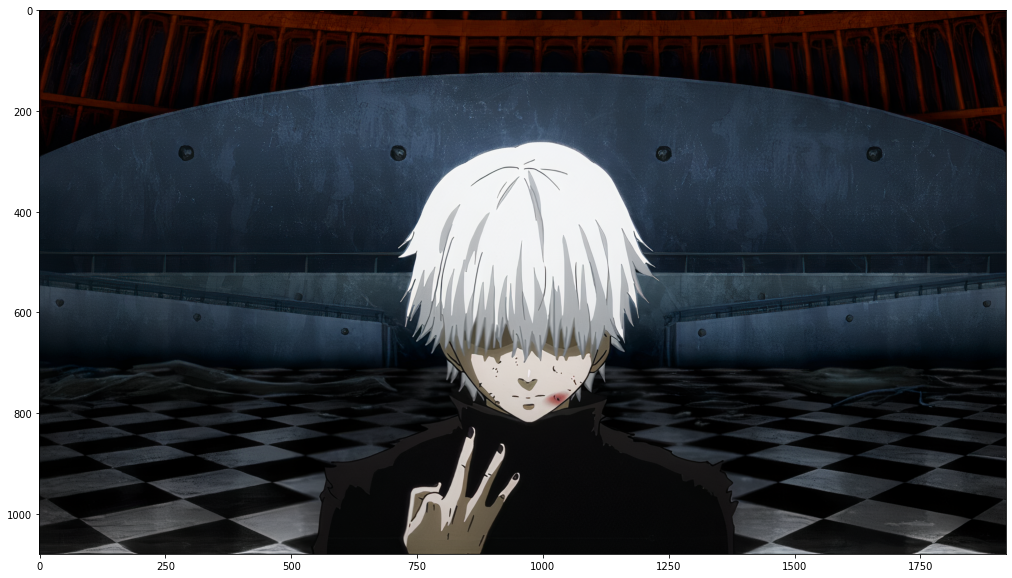

In [48]:
img = cv2.imread('../lab1/kaneki.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

виконує інвертування кольорової інтенсивності пікселів завантаженого користувачем зображення. Вивести вхідне та отримане зображення;


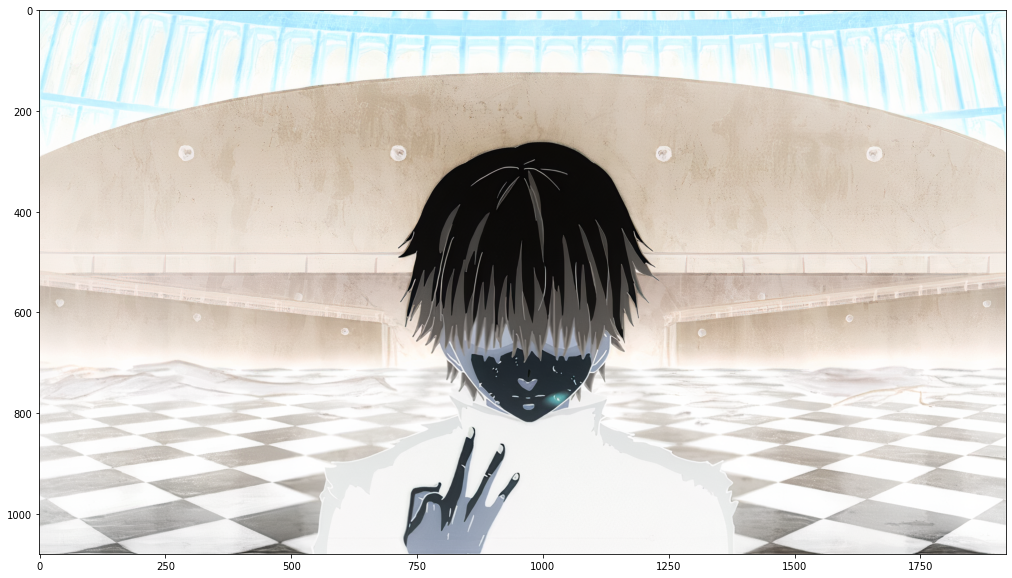

In [8]:
invert_img = 255 - img
plt.imshow(invert_img)

для деякої (однієї з трьох) компонент виконує зміну, наприклад, до кожного пікселя додає якесь постійне значення. Вивести усі зображення в об’єкти типу ImageView.

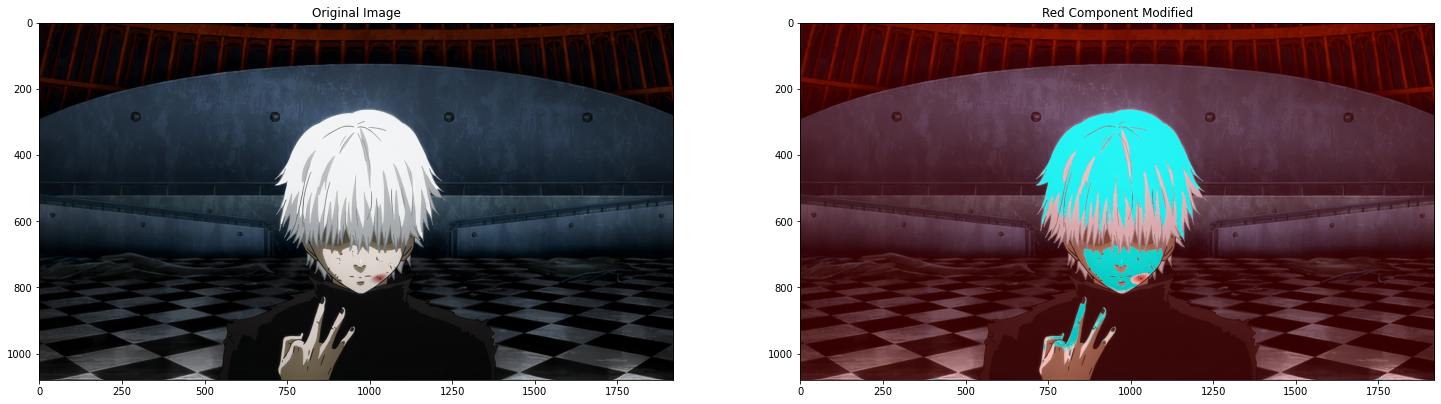

In [9]:
red_component_modified = img.copy()
red_component_modified[:, :, 0] = np.clip(red_component_modified[:, :, 0] + 50, 0, 255)


plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(red_component_modified), plt.title('Red Component Modified')
plt.show()

виконує розбивку зображення на компоненти Red, Green та Blue.


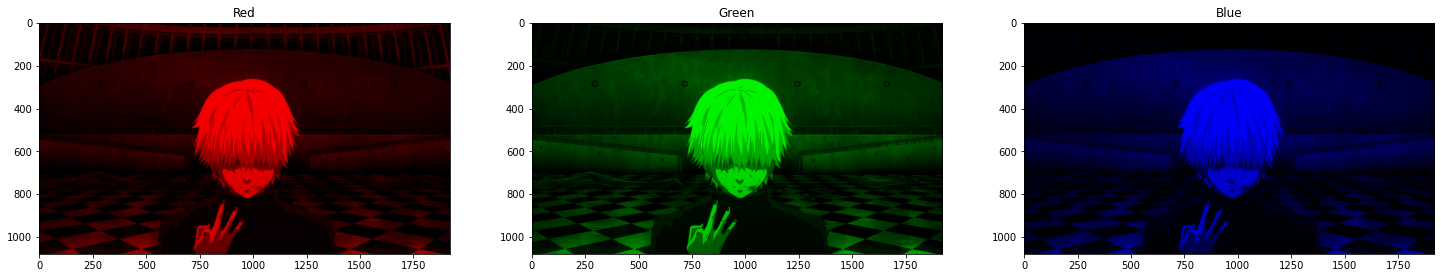

In [15]:

red = img.copy()    
green = img.copy()
blue = img.copy()

red[:, :, 1] = 0
red[:, :, 2] = 0

green[:, :, 0] = 0
green[:, :, 2] = 0

blue[:, :, 0] = 0
blue[:, :, 1] = 0   

plt.subplot(1, 3, 1), plt.imshow(red), plt.title('Red')
plt.subplot(1, 3, 2), plt.imshow(green), plt.title('Green')
plt.subplot(1, 3, 3), plt.imshow(blue), plt.title('Blue')
plt.show()

виконує «злиття» двох зображень у певних пропорціях

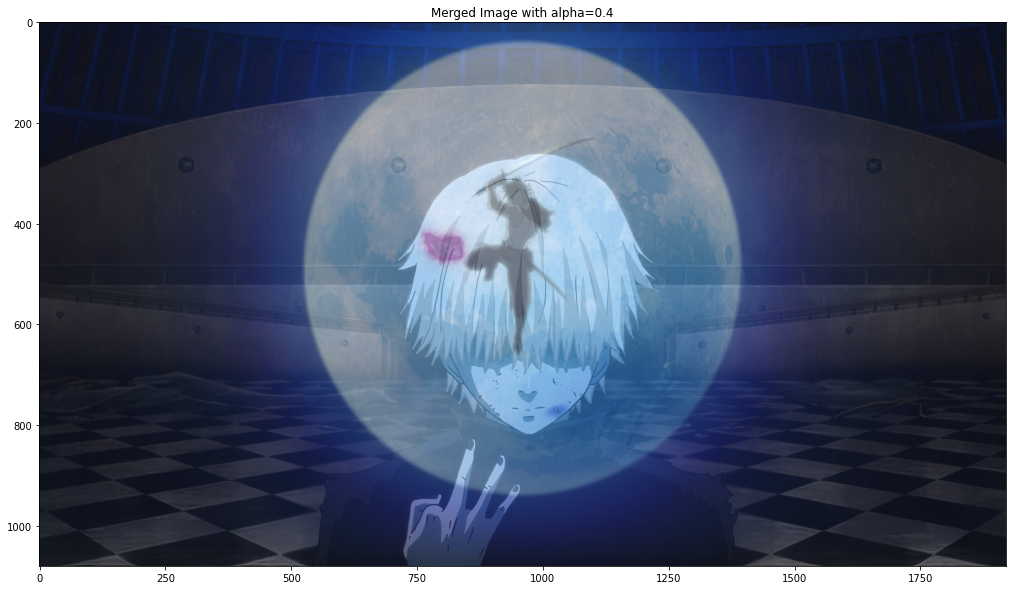

In [17]:
img_2 = cv2.imread('../lab1/blue.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)


if img_rgb.shape != img2_rgb.shape:
    img2_rgb = cv2.resize(img2_rgb, (img_rgb.shape[1], img_rgb.shape[0]))


alpha = 0.4


merged_image = alpha * img_rgb + (1 - alpha) * img2_rgb


merged_image = np.clip(merged_image, 0, 255).astype(np.uint8)


plt.imshow(merged_image)
plt.title(f'Merged Image with alpha={alpha}')

plt.show()

виконує фільтрацію вхідного зображення з використанням матричних фільтрів, що описані у лабораторній роботі (фільтр розмиття, фільтр поліпшення чіткості, медіанний фільтр, фільтр ерозії і нарощування та фільтр Собеля).

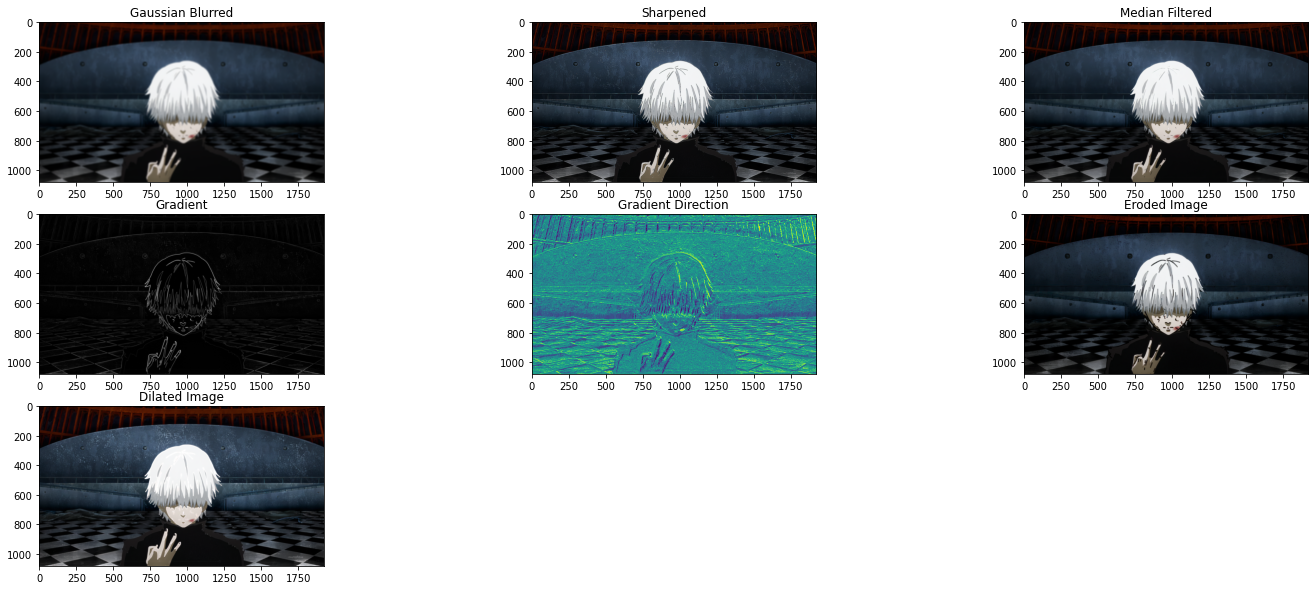

In [30]:
blurred = cv2.GaussianBlur(img, (15, 15), 5)


kernel_sharpening = np.array([[-1, -1, -1], 
                              [-1, 9, -1], 
                              [-1, -1, -1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)


median_filtered = cv2.medianBlur(img, 5)


sobelx = cv2.Sobel(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) / 255, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) / 255, cv2.CV_64F, 0, 1, ksize=5)
grad = np.sqrt(np.square(sobelx) + np.square(sobely))
grad_dir = np.arctan2(sobely, sobelx) 

eroded_image = cv2.erode(img, np.ones((5, 5), np.uint8), iterations=1)
dilated_image = cv2.dilate(img, np.ones((5, 5), np.uint8), iterations=1)


plt.subplot(3, 3, 1), plt.imshow(blurred), plt.title('Gaussian Blurred')
plt.subplot(3, 3, 2), plt.imshow(sharpened), plt.title('Sharpened')
plt.subplot(3, 3, 3), plt.imshow(median_filtered), plt.title('Median Filtered')
plt.subplot(3, 3, 4), plt.imshow(grad, cmap='gray'), plt.title('Gradient')
plt.subplot(3, 3, 5), plt.imshow(grad_dir), plt.title('Gradient Direction')
plt.subplot(3, 3, 6), plt.imshow(eroded_image), plt.title('Eroded Image')
plt.subplot(3, 3, 7), plt.imshow(dilated_image), plt.title('Dilated Image')
plt.show()

(<matplotlib.image.AxesImage at 0x19b75168160>, (-0.5, 294.5, 66.5, -0.5))

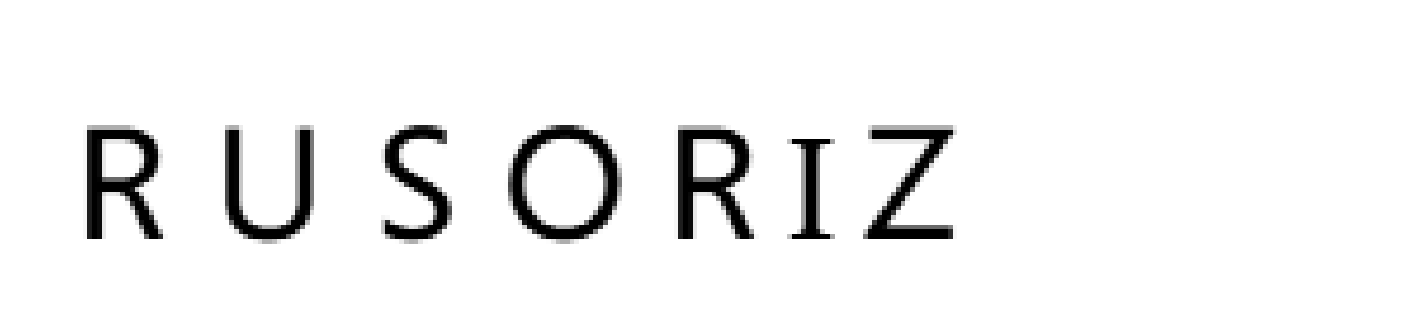

In [39]:
watermark = cv2.imread('watermark.png')
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2GRAY)
plt.imshow(watermark, cmap='gray'), plt.axis('off')

In [57]:
def add_watermark(img, watermark, bit_plane ):
    image = img.copy()

    
    if len(watermark.shape) != 2:
        raise ValueError('Watermark must be a grayscale image')

    
    if watermark.shape[0] < image.shape[0] or watermark.shape[1] < image.shape[1]:
        wm_tiled = np.tile(watermark, 
                           (np.ceil(image.shape[0] / watermark.shape[0]).astype(int), 
                            np.ceil(image.shape[1] / watermark.shape[1]).astype(int)))
        watermark = wm_tiled[:image.shape[0], :image.shape[1]]  
    

    if bit_plane < 1 or bit_plane > 8:
        raise ValueError('Bit plane must be between 1 and 8')

   
    watermark_binary = (watermark > 128).astype(np.uint8)

 
    blue_channel = image[:, :, 2].copy()

   
    bit_plane_mask = 1 << (bit_plane - 1)

    
    blue_channel = np.bitwise_and(blue_channel, ~bit_plane_mask)

    
    blue_channel = np.bitwise_or(blue_channel, watermark_binary * bit_plane_mask)


    image[:, :, 2] = blue_channel

    return image
   


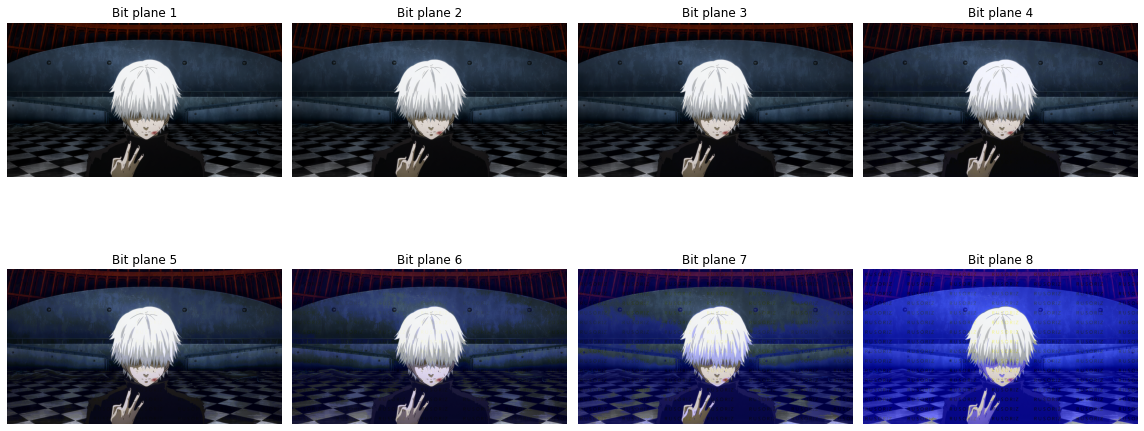

In [61]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8)) 
axes = axes.ravel()  
    
for i in range(8):
    img_w = add_watermark(img, watermark, bit_plane=i+1)  
    axes[i].imshow(img_w) 
    axes[i].set_title(f"Bit plane {i+1}")  
    axes[i].axis('off')  

plt.tight_layout()
plt.show()